## Parte 1 do TCC - Juliana Lemos Martins Casagrande

## 1. Leitura dos arquivos <br><br>

In [1]:
# Importação das bibliotecas necessárias.

import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

# Exibe os números com dois pontos decimais, ponto como separador de decimal
# e vírgula como separador de milhar, sem notação científica.
pd.options.display.float_format = '{:,.2f}'.format

# Indicação do caminho do diretório de trabalho.
os.chdir('D:/TCC2024')

In [2]:
# Leitura do arquivo de doadores
dbdoacoes = pd.read_csv("DBF/dbf-doadores.csv", encoding = "iso-8859-1", sep=";", decimal=",",\
                    dtype = {"ano_cal": int,"fonte": str, "base_legal": str, "uf_doador": str,\
                             "munic_doador": str, "qtde_doadores": int, "vl_total_doacao": float,\
                             "vl_total_dedutivel": float})
print("DOACOES\n",dbdoacoes.head())
print("\nINFO DOACOES\n")
print(dbdoacoes.info())

DOACOES
    ano_cal   fonte     base_legal uf_doador    munic_doador  qtde_doadores  \
0     2002  ANCINE  NAO INFORMADA        AM     MANAUS - AM              2   
1     2002  ANCINE  NAO INFORMADA        CE    EUSEBIO - CE              1   
2     2002  ANCINE  NAO INFORMADA        CE  FORTALEZA - CE              3   
3     2002  ANCINE  NAO INFORMADA        DF   BRASILIA - DF              7   
4     2002  ANCINE  NAO INFORMADA        ES    VITORIA - ES              3   

   vl_total_doacao  vl_total_dedutivel  
0     2,095,139.97        2,095,139.97  
1       300,000.00          300,000.00  
2     1,048,074.00        1,048,074.00  
3     2,386,500.00        2,386,500.00  
4       300,000.00          300,000.00  

INFO DOACOES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77736 entries, 0 to 77735
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano_cal             77736 non-null  int32  
 1   f

In [3]:
# Leitura do arquivo de beneficiários
dbbenef = pd.read_csv("DBF/dbf-beneficiarios-municipio.csv", encoding = "iso-8859-1", sep=";", decimal=",",\
                    dtype = {"ano_cal": int,"fonte": str, "base_legal": str, "uf_beneficiario": str,\
                             "munic_beneficiario": str, "qtde_beneficiarios": int, "vl_total_doacao": float,\
                             "vl_total_dedutivel": float})
print("BENEFICIARIOS\n",dbbenef.head())
print("\nINFO BENEFICIARIOS\n")
print(dbbenef.info())

BENEFICIARIOS
    ano_cal   fonte     base_legal uf_beneficiario   munic_beneficiario  \
0     2002  ANCINE  NAO INFORMADA              BA        SALVADOR - BA   
1     2002  ANCINE  NAO INFORMADA              CE       FORTALEZA - CE   
2     2002  ANCINE  NAO INFORMADA              CE         QUIXADA - CE   
3     2002  ANCINE  NAO INFORMADA              DF        BRASILIA - DF   
4     2002  ANCINE  NAO INFORMADA              MG  BELO HORIZONTE - MG   

   qtde_beneficiarios  vl_total_doacao  vl_total_dedutivel  
0                   1       100,000.00          100,000.00  
1                   1       200,000.00          200,000.00  
2                   1       960,000.00          960,000.00  
3                   4     1,220,223.43        1,220,223.43  
4                   3     2,008,304.00        2,008,304.00  

INFO BENEFICIARIOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30028 entries, 0 to 30027
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtyp

Observa-se que não há valores nulos/ausentes nem no arquivo de doações, nem no arquivo de beneficiários.

<br>

## 2. Tratamento dos dados

### 2.1. Seleção dos registros da Lei Rouanet e dos anos de 2010 a 2022

In [4]:
# Verifica valores únicos no campo de base legal
dbdoacoes['base_legal'].unique()

array(['NAO INFORMADA',
       'INCISO I, ART.12, LEI 9.250/1995 E ART 260, LEI 8.069/1991',
       'ARTIGO 1º, LEI 11.438/2006', 'ARTIGO 18, LEI 8313/1991',
       'ARTIGO 25 E 26, LEI 8313/1991', 'ARTIGO 1º, LEI 8685/1993',
       'ARTIGO 1ºA, LEI 8685/1993', 'ARTS. 2º E 3º, LEI 12.213/2010',
       'ARTS. 1º E 4º, LEI 12.715/2012', 'ARTS. 3º E 4º, LEI 12.715/2012'],
      dtype=object)

In [5]:
# Seleciona apenas os registros com a lei Rouanet - arquivo de doadores
doacoesRouanet = dbdoacoes.loc[dbdoacoes['base_legal'].isin(['ARTIGO 18, LEI 8313/1991','ARTIGO 25 E 26, LEI 8313/1991'])]
doacoesRouanet.set_index('ano_cal', inplace = True)
doacoes = doacoesRouanet.loc[2010:]
doacoes

,fonte,base_legal,uf_doador,munic_doador,qtde_doadores,vl_total_doacao,vl_total_dedutivel
ano_cal,,,,,,,
2010,ANCINE,"ARTIGO 18, LEI 8313/1991",MS,BATAGUACU - MS,1,"1,000.00","1,000.00"
2010,ANCINE,"ARTIGO 18, LEI 8313/1991",MS,DOURADOS - MS,1,"1,000.00","1,000.00"
2010,ANCINE,"ARTIGO 18, LEI 8313/1991",MS,NOVA ANDRADINA - MS,1,"1,000.00","1,000.00"
2010,ANCINE,"ARTIGO 18, LEI 8313/1991",RJ,RIO DE JANEIRO - RJ,2,"1,650,000.00","1,650,000.00"
2010,ANCINE,"ARTIGO 18, LEI 8313/1991",SP,CUBATAO - SP,1,"15,500.00","15,500.00"
...,...,...,...,...,...,...,...
2022,MINC,"ARTIGO 25 E 26, LEI 8313/1991",SP,LOUVEIRA - SP,1,"50,000.00","15,000.00"
2022,MINC,"ARTIGO 25 E 26, LEI 8313/1991",SP,MOGI MIRIM - SP,3,"136,702.00","46,714.50"
2022,MINC,"ARTIGO 25 E 26, LEI 8313/1991",SP,SAO PAULO - SP,13,"4,688,332.28","1,422,749.65"


In [6]:
# Seleciona apenas os registros com a lei Rouanet - arquivo de beneficiários
benefRouanet = dbbenef.loc[dbbenef['base_legal'].isin(['ARTIGO 18, LEI 8313/1991','ARTIGO 25 E 26, LEI 8313/1991'])]
benefRouanet.set_index('ano_cal', inplace = True)
benef = benefRouanet.loc[2010:]
benef

,fonte,base_legal,uf_beneficiario,munic_beneficiario,qtde_beneficiarios,vl_total_doacao,vl_total_dedutivel
ano_cal,,,,,,,
2010,ANCINE,"ARTIGO 18, LEI 8313/1991",RJ,RIO DE JANEIRO - RJ,2,"2,580,000.00","2,580,000.00"
2010,ANCINE,"ARTIGO 18, LEI 8313/1991",SP,SAO PAULO - SP,1,"36,500.00","36,500.00"
2010,ANCINE,"ARTIGO 25 E 26, LEI 8313/1991",BA,SALVADOR - BA,1,"120,000.00","36,000.00"
2010,ANCINE,"ARTIGO 25 E 26, LEI 8313/1991",MG,BELO HORIZONTE - MG,1,"100,000.00","30,000.00"
2010,ANCINE,"ARTIGO 25 E 26, LEI 8313/1991",PE,RECIFE - PE,1,"7,040.00","2,112.00"
...,...,...,...,...,...,...,...
2022,MINC,"ARTIGO 25 E 26, LEI 8313/1991",SP,EMBU DAS ARTES - SP,1,"780,000.00","234,000.00"
2022,MINC,"ARTIGO 25 E 26, LEI 8313/1991",SP,MAIRIPORA - SP,1,"100,000.00","30,000.00"
2022,MINC,"ARTIGO 25 E 26, LEI 8313/1991",SP,MOGI MIRIM - SP,1,"136,702.00","46,714.50"


<br>

### 2.2. Inserção de coluna com a região geográfica e alteração da ordem das colunas <br> <br>


In [7]:
# Reseta os índices
doacoes.reset_index(inplace = True)
benef.reset_index(inplace = True)

In [8]:
# Inserção de coluna com a região geográfica, utilizando np.select.
conditions = [
    (doacoes['uf_doador'].isin(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'])),
    (doacoes['uf_doador'].isin(['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'])),
    (doacoes['uf_doador'].isin(['DF','GO','MT','MS'])),
    (doacoes['uf_doador'].isin(['ES','MG','RJ','SP'])),
    (doacoes['uf_doador'].isin(['PR','SC','RS'])),
    (doacoes['uf_doador'].isin(['EX']))
]
values = ['Nordeste', 'Norte', 'Centro-Oeste', 'Sudeste', 'Sul', 'Exterior']
doacoes['regiao_doador'] = np.select(conditions, values)
conditions2 = [
    (benef['uf_beneficiario'].isin(['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'])),
    (benef['uf_beneficiario'].isin(['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'])),
    (benef['uf_beneficiario'].isin(['DF','GO','MT','MS'])),
    (benef['uf_beneficiario'].isin(['ES','MG','RJ','SP'])),
    (benef['uf_beneficiario'].isin(['PR','SC','RS'])),
    (benef['uf_beneficiario'].isin(['EX']))
]
benef['regiao_benef'] = np.select(conditions2, values)

# Alteração da ordem das colunas
cols_doacoes = ["ano_cal", "fonte", "base_legal", "regiao_doador", "uf_doador", "munic_doador", \
                "qtde_doadores", "vl_total_doacao", "vl_total_dedutivel"]
doacoes = doacoes[cols_doacoes]
cols_benefs = ["ano_cal", "fonte", "base_legal", "regiao_benef", "uf_beneficiario", \
               "munic_beneficiario", "qtde_beneficiarios", "vl_total_doacao", "vl_total_dedutivel"]
benef = benef[cols_benefs]

print("DOAÇÕES\n",doacoes.head())
print("\nINFO DOAÇÕES\n")
print(doacoes.info())
print("BENEFICIÁRIOS\n",benef.head())
print("\nINFO BENEFICIÁRIOS\n")
print(benef.info())


DOAÇÕES
    ano_cal   fonte                base_legal regiao_doador uf_doador  \
0     2010  ANCINE  ARTIGO 18, LEI 8313/1991  Centro-Oeste        MS   
1     2010  ANCINE  ARTIGO 18, LEI 8313/1991  Centro-Oeste        MS   
2     2010  ANCINE  ARTIGO 18, LEI 8313/1991  Centro-Oeste        MS   
3     2010  ANCINE  ARTIGO 18, LEI 8313/1991       Sudeste        RJ   
4     2010  ANCINE  ARTIGO 18, LEI 8313/1991       Sudeste        SP   

          munic_doador  qtde_doadores  vl_total_doacao  vl_total_dedutivel  
0       BATAGUACU - MS              1         1,000.00            1,000.00  
1        DOURADOS - MS              1         1,000.00            1,000.00  
2  NOVA ANDRADINA - MS              1         1,000.00            1,000.00  
3  RIO DE JANEIRO - RJ              2     1,650,000.00        1,650,000.00  
4         CUBATAO - SP              1        15,500.00           15,500.00  

INFO DOAÇÕES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14182 entries, 0 to 14181
Data 

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8856\67041981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doacoes['regiao_doador'] = np.select(conditions, values)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_8856\67041981.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benef['regiao_benef'] = np.select(conditions2, values)


<AxesSubplot: xlabel='regiao_doador'>

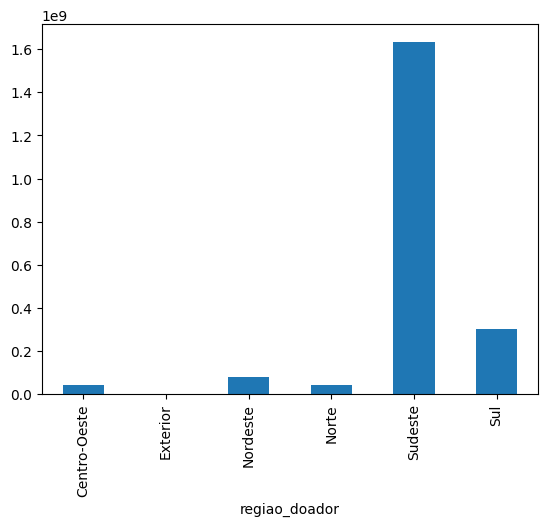

In [9]:
# Gráfico da região geográfica dos doadores no ano de 2022
doacoes22 = doacoes[doacoes['ano_cal']==2022]
doareg = doacoes22.groupby(['regiao_doador'])['vl_total_doacao'].sum()
doareg.plot.bar()

<AxesSubplot: xlabel='regiao_benef'>

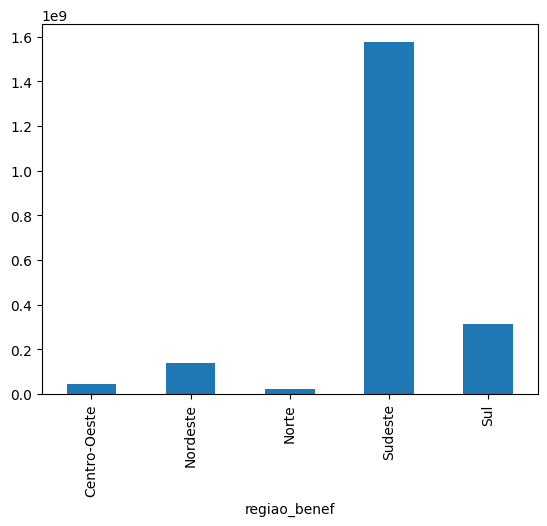

In [10]:
# Gráfico da região geográfica dos beneficiários no ano de 2022
benef22 = benef[benef['ano_cal']==2022]
benreg = benef22.groupby(['regiao_benef'])['vl_total_doacao'].sum()
benreg.plot.bar()

<AxesSubplot: xlabel='uf_doador'>

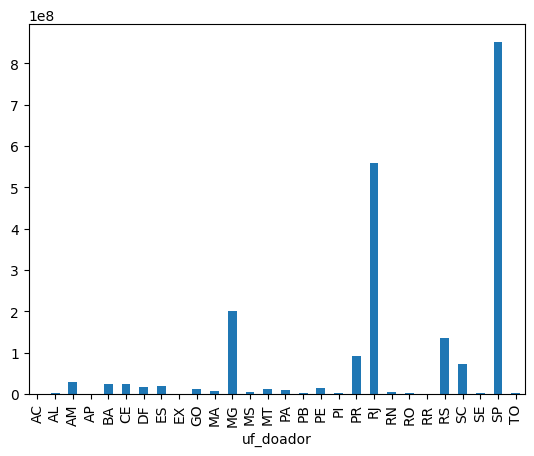

In [11]:
# Gráfico mostrando estados dos doadores no ano de 2022
doaest = doacoes22.groupby(['uf_doador'])['vl_total_doacao'].sum()
doaest.plot.bar()

<AxesSubplot: xlabel='uf_beneficiario'>

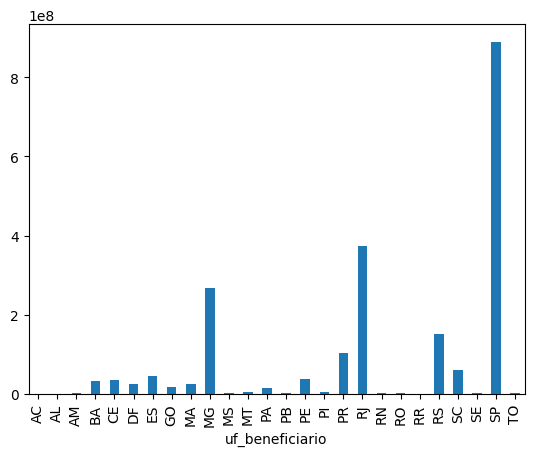

In [12]:
# Gráfico mostrando estados dos beneficiários no ano de 2022
benest = benef22.groupby(['uf_beneficiario'])['vl_total_doacao'].sum()
benest.plot.bar()

<br>

### 2.3. Checagem de valores duplicados <br> <br>

In [13]:
# Verifica os registros duplicados, considerando apenas as colunas de ano, base legal e município.
duplicados_doacoes = doacoes[doacoes.duplicated(subset = (["ano_cal", "base_legal", "munic_doador"]), \
                                                keep = False)].sort_values(["ano_cal", "base_legal", "munic_doador"])
duplicados_beneficiarios = benef[benef.duplicated(subset = (["ano_cal", "base_legal", "munic_beneficiario"]), \
                                                         keep = False)].sort_values (["ano_cal", "base_legal", \
                                                                                      "munic_beneficiario"])
print("DUPLICADOS - DOAÇÕES\n",duplicados_doacoes.head(20))
print(duplicados_doacoes.shape)
print("TIPOS DE FONTES - DOAÇÕES\n",duplicados_doacoes['fonte'].unique())
print("DUPLICADOS - BENEFICIÁRIOS\n",duplicados_beneficiarios.head(20))
print(duplicados_beneficiarios.shape)
print("TIPOS DE FONTES - BENEFICIÁRIOS\n",duplicados_beneficiarios['fonte'].unique())

DUPLICADOS - DOAÇÕES
       ano_cal   fonte                     base_legal regiao_doador uf_doador  \
4        2010  ANCINE       ARTIGO 18, LEI 8313/1991       Sudeste        SP   
1090     2010    MINC       ARTIGO 18, LEI 8313/1991       Sudeste        SP   
1        2010  ANCINE       ARTIGO 18, LEI 8313/1991  Centro-Oeste        MS   
467      2010    MINC       ARTIGO 18, LEI 8313/1991  Centro-Oeste        MS   
5        2010  ANCINE       ARTIGO 18, LEI 8313/1991       Sudeste        SP   
1195     2010    MINC       ARTIGO 18, LEI 8313/1991       Sudeste        SP   
6        2010  ANCINE       ARTIGO 18, LEI 8313/1991       Sudeste        SP   
1221     2010    MINC       ARTIGO 18, LEI 8313/1991       Sudeste        SP   
3        2010  ANCINE       ARTIGO 18, LEI 8313/1991       Sudeste        RJ   
696      2010    MINC       ARTIGO 18, LEI 8313/1991       Sudeste        RJ   
7        2010  ANCINE       ARTIGO 18, LEI 8313/1991       Sudeste        SP   
1257     2010    M

<br>
<br> Observa-se que os registros com mesmos dados de município, ano e base legal se referem a informações prestadas pela Ancine e pelo MinC.

Ambos os órgãos estão obrigados à prestação de informações na DBF, conforme Instrução Normativa RFB nº 1.307/2012, art. 2º, III e IV:

> *Art. 2º Ficam obrigados à apresentação da DBF:*

> *(...)*

> *III - o Ministério da Cultura, no que diz respeito às contribuições ao Fundo Nacional da Cultura (FNC), às doações e aos patrocínios a projetos culturais que tenham sido previamente aprovados por esse órgão e aos valores despendidos a título de aquisição do vale-cultura; (Redação dada pelo(a) Instrução Normativa RFB nº 1426, de 20 de dezembro de 2013)*

> *IV - a Agência Nacional do Cinema (Ancine), no que diz respeito às doações, aos investimentos e aos patrocínios a projetos de obras audiovisuais que tenham sido previamente aprovados por essa agência e aos benefícios fiscais oriundos de remessas para o exterior;*

> *(...)*

Aparentemente, não há duplicidade de valores, pois as informações prestadas pela Ancine e pelo MinC são distintas e, ademais, os valores não são sequer próximos. Iremos considerar, para este trabalho, que **não há valores duplicados.**
<br>
<br>

### 2.4. Comparação dos totais das duas bases (doações e beneficiários) <br> <br>

In [14]:
# Verifica o total de doações por ano, em R$ milhões
vls_doados_ano = doacoes.groupby('ano_cal')['vl_total_doacao'].sum()
vls_doados_ano=vls_doados_ano.to_frame()
doac_milhoes = vls_doados_ano['vl_total_doacao'].astype(float)/1000000
vls_doados_ano['vl_total_doacao_milhoes'] = doac_milhoes.round(2)
print('VALORES DOADOS POR ANO\n',vls_doados_ano)

# Verifica o total de doações dedutíveis por ano, em R$ milhões
vls_doados_ded_ano = doacoes.groupby('ano_cal')['vl_total_dedutivel'].sum()
vls_doados_ded_ano=vls_doados_ded_ano.to_frame()
doac_ded_milhoes = vls_doados_ded_ano['vl_total_dedutivel'].astype(float)/1000000
vls_doados_ded_ano['vl_total_ded_milhoes'] = doac_ded_milhoes.round(2)
print('VALORES DOADOS DEDUTÍVEIS POR ANO\n',vls_doados_ded_ano)

# Verifica o total de doações por ano, em R$ milhões, no arquivo de beneficiários
vls_benef_ano = benef.groupby('ano_cal')['vl_total_doacao'].sum()
vls_benef_ano = vls_benef_ano.to_frame()
benef_milhoes = vls_benef_ano['vl_total_doacao'].astype(float)/1000000
vls_benef_ano['vl_total_doacao_milhoes'] = benef_milhoes.round(2)
print('VALORES BENEFÍCIOS POR ANO\n',vls_benef_ano)

# Verifica o total de doações dedutíveis por ano, em R$ milhões, no arquivo de beneficiários
vls_benef_ded_ano = benef.groupby('ano_cal')['vl_total_dedutivel'].sum()
vls_benef_ded_ano = vls_benef_ded_ano.to_frame()
benef_ded_milhoes = vls_benef_ded_ano['vl_total_dedutivel'].astype(float)/1000000
vls_benef_ded_ano['vl_total_ded_milhoes'] = benef_ded_milhoes.round(2)
print('VALORES BENEFÍCIOS DEDUTÍVEIS POR ANO\n',vls_benef_ded_ano)

VALORES DOADOS POR ANO
          vl_total_doacao  vl_total_doacao_milhoes
ano_cal                                          
2010    1,165,872,001.74                 1,165.87
2011    1,330,047,539.21                 1,330.05
2012    1,277,927,822.01                 1,277.93
2013    1,261,392,243.19                 1,261.39
2014    1,336,379,868.68                 1,336.38
2015    1,205,623,972.86                 1,205.62
2016    1,146,424,698.75                 1,146.42
2017    1,189,635,059.02                 1,189.64
2018    1,296,122,567.51                 1,296.12
2019    1,483,220,758.90                 1,483.22
2020    1,502,271,102.46                 1,502.27
2021    2,132,517,131.94                 2,132.52
2022    2,099,930,272.54                 2,099.93
VALORES DOADOS DEDUTÍVEIS POR ANO
          vl_total_dedutivel  vl_total_ded_milhoes
ano_cal                                          
2010       1,064,049,602.61              1,064.05
2011       1,230,788,385.19              

In [15]:
# Totalizações
print('TOTAL DE DOAÇÕES DE 2010 A 2021, EM R$ MILHÕES\n', vls_doados_ano['vl_total_doacao_milhoes'].sum())
print('TOTAL DE DOAÇÕES DEDUTÍVEIS, DE 2010 A 2021, EM R$ MILHÕES\n', vls_doados_ded_ano['vl_total_ded_milhoes'].sum())
print('TOTAL DE DOAÇÕES, DE 2010 A 2021 - ARQUIVO DE BENEFICIÁRIOS - EM R$ MILHÕES\n', vls_benef_ano['vl_total_doacao_milhoes'].sum())
print('TOTAL DE DOAÇÕES DEDUTÍVEIS, DE 2010 A 2021 - ARQUIVO DE BENEFICIÁRIOS - EM R$ MILHÕES\n', vls_benef_ded_ano['vl_total_ded_milhoes'].sum())

TOTAL DE DOAÇÕES DE 2010 A 2021, EM R$ MILHÕES
 18427.359999999997
TOTAL DE DOAÇÕES DEDUTÍVEIS, DE 2010 A 2021, EM R$ MILHÕES
 17833.45
TOTAL DE DOAÇÕES, DE 2010 A 2021 - ARQUIVO DE BENEFICIÁRIOS - EM R$ MILHÕES
 18427.359999999997
TOTAL DE DOAÇÕES DEDUTÍVEIS, DE 2010 A 2021 - ARQUIVO DE BENEFICIÁRIOS - EM R$ MILHÕES
 17833.45


<br> 
Observa-se que os totais de doações e de doações dedutíveis são iguais nas duas bases de dados (doações e beneficiários). <br> Esse fato é mais um elemento demonstrando a consistência das duas bases. <br> <br>

### 2.5. Leitura do arquivo dbf-doacoes-projetos-culturais.csv, para obter a quantidade de pessoas físicas e jurídicas

In [16]:
dbf_doa_proj_cul = pd.read_csv('DBF/dbf-doacoes-projetos-culturais.csv',encoding = "iso-8859-1", sep = ";", decimal = ",", usecols = [8, 10, 11, 12, 13, 14, 15],\
                              names = ('Ano', 'Qtd contribuintes PF','Doação contr PF', 'Doação ded contr PF', 'Qtd contribuintes PJ', 'Doação contr PJ', \
                                       'Doação ded contr PJ'), \
                               dtype = {'Ano': 'Int64', 'Qtd contribuintes PF': 'Int64', 'Doação contr PF': 'float','Doação ded contr PF': 'float', \
                                        'Qtd contribuintes PJ': 'Int64', 'Doação contr PJ': 'float', 'Doação ded contr PJ': 'float'}, header=0)

# Remove a linha de totais
#dbf_doa_proj_cul.drop([23], inplace = True) 
# Remove as linhas de 2009 e de 2022
#dbf_doa_proj_cul.drop([13], inplace = True)
#dbf_doa_proj_cul.drop([8], inplace = True)
# Agrega por ano
doa_pc = dbf_doa_proj_cul.groupby('Ano').sum() 
# % de doações que são dedutíveis - PF
doa_pc['% ded PF'] = doa_pc['Doação contr PF'] / doa_pc['Doação ded contr PF'] * 100 
# Calcula a média de doações por PF
doa_pc['Média_PF'] = doa_pc['Doação contr PF'] / doa_pc['Qtd contribuintes PF'] 
# Calcula a média de doações por PF
doa_pc['Média_PJ'] = doa_pc['Doação contr PJ'] / doa_pc['Qtd contribuintes PJ'] 
# % de doações que são dedutíveis - Pj
doa_pc['% ded PJ'] = doa_pc['Doação contr PJ'] / doa_pc['Doação ded contr PJ'] * 100 
doa_pc.head()

,Qtd contribuintes PF,Doação contr PF,Doação ded contr PF,Qtd contribuintes PJ,Doação contr PJ,Doação ded contr PJ,% ded PF,Média_PF,Média_PJ,% ded PJ
Ano,,,,,,,,,,
2010,19960,"16,340,117.53","15,718,870.96",3198,"1,244,872,707.10","1,143,671,557.10",103.95,818.64,"389,266.01",108.85
2011,16217,"19,834,848.40","19,271,419.03",3548,"1,406,539,093.80","1,307,843,371.33",102.92,"1,223.09","396,431.54",107.55
2012,16843,"22,829,149.32","22,743,575.33",3447,"1,333,528,604.07","1,251,476,478.57",100.38,"1,355.41","386,866.44",106.56
2013,8011,"24,184,460.63","24,022,587.08",3819,"1,338,837,831.00","1,274,343,524.80",100.67,"3,018.91","350,572.88",105.06
2014,9708,"25,276,920.60","25,132,084.10",3850,"1,413,986,082.70","1,344,006,697.30",100.58,"2,603.72","367,269.11",105.21


In [17]:
# Reorganiza as colunas
cols = ['Qtd contribuintes PF','Doação contr PF', 'Média_PF', 'Doação ded contr PF', '% ded PF','Qtd contribuintes PJ', 'Doação contr PJ',\
        'Média_PJ','Doação ded contr PJ', '% ded PF']
doa_pc = doa_pc[cols]
doa_pc

,Qtd contribuintes PF,Doação contr PF,Média_PF,Doação ded contr PF,% ded PF,Qtd contribuintes PJ,Doação contr PJ,Média_PJ,Doação ded contr PJ,% ded PF
Ano,,,,,,,,,,
2010,19960,"16,340,117.53",818.64,"15,718,870.96",103.95,3198,"1,244,872,707.10","389,266.01","1,143,671,557.10",103.95
2011,16217,"19,834,848.40","1,223.09","19,271,419.03",102.92,3548,"1,406,539,093.80","396,431.54","1,307,843,371.33",102.92
2012,16843,"22,829,149.32","1,355.41","22,743,575.33",100.38,3447,"1,333,528,604.07","386,866.44","1,251,476,478.57",100.38
2013,8011,"24,184,460.63","3,018.91","24,022,587.08",100.67,3819,"1,338,837,831.00","350,572.88","1,274,343,524.80",100.67
2014,9708,"25,276,920.60","2,603.72","25,132,084.10",100.58,3850,"1,413,986,082.70","367,269.11","1,344,006,697.30",100.58
2015,12444,"32,772,307.15","2,633.58","32,697,252.67",100.23,3651,"1,262,687,210.89","345,846.95","1,210,571,886.73",100.23
2016,12100,"35,398,718.10","2,925.51","35,333,085.58",100.19,3305,"1,191,128,103.34","360,401.85","1,158,909,043.34",100.19
2017,11760,"35,731,987.75","3,038.43","35,625,262.75",100.30,3654,"1,239,300,603.83","339,162.73","1,216,710,185.83",100.30
2018,13928,"39,527,714.70","2,838.00","39,494,951.41",100.08,4013,"1,332,082,221.46","331,941.74","1,312,481,066.46",100.08


<AxesSubplot: xlabel='Ano'>

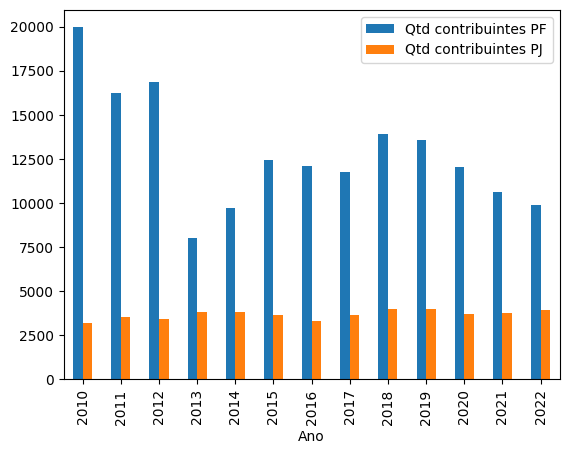

In [18]:
# Gráfico comparativo entre quantidades - PF e PJ
qt = doa_pc[['Qtd contribuintes PF', 'Qtd contribuintes PJ']]
qt.plot.bar()

<AxesSubplot: xlabel='Ano', ylabel='Doação, em R$ milhões'>

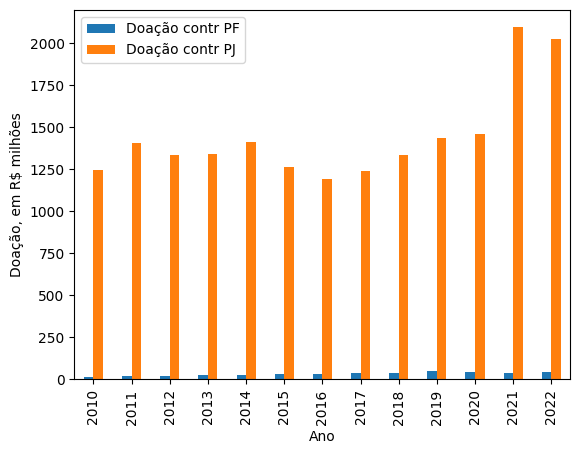

In [19]:
# Gráfico comparativo entre doações - PF e PJ
vl_doa = doa_pc[['Doação contr PF', 'Doação contr PJ']]/1000000
vl_doa.plot.bar(ylabel='Doação, em R$ milhões')

<AxesSubplot: xlabel='Ano'>

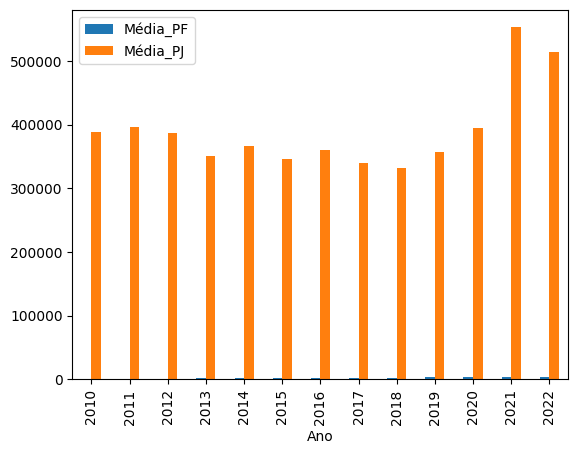

In [20]:
# Gráfico comparativo entre doações médias - PF e PJ
med_doa = doa_pc[['Média_PF','Média_PJ']]
med_doa.plot.bar()

In [21]:
dbf_doa_proj_cul

,Ano,Qtd contribuintes PF,Doação contr PF,Doação ded contr PF,Qtd contribuintes PJ,Doação contr PJ,Doação ded contr PJ
0,2013,7918,"22,327,129.18","22,165,255.63",3472,"1,238,482,632.00","1,174,112,563.00"
1,2011,15965,"18,555,172.55","17,991,743.18",3276,"1,306,370,674.00","1,208,028,729.00"
2,2015,12386,"31,492,447.23","31,417,392.75",3388,"1,172,356,631.00","1,120,384,733.00"
3,2017,11731,"35,121,976.22","35,015,251.22",3356,"1,154,264,383.00","1,131,841,965.00"
4,2018,13887,"38,254,105.39","38,221,342.10",3740,"1,257,727,962.00","1,238,210,807.00"
5,2019,13557,"48,118,556.11","48,047,594.53",4011,"1,435,022,703.00","1,424,373,813.00"
6,2020,12030,"41,985,008.28","41,910,122.89",3697,"1,460,283,294.00","1,442,935,835.00"
7,2021,10636,"39,142,566.13","39,059,978.38",3787,"2,093,374,566.00","2,082,113,592.00"
8,2022,9915,"44,686,155.20","44,602,625.35",3930,"2,023,559,111.00","2,015,907,178.00"
9,2010,19867,"15,854,013.53","15,232,766.96",2921,"1,147,128,252.00","1,046,118,405.00"


### 2.6. Juntada das bases de doações e do PIB por ano <br><br>

In [22]:
# Leitura do arquivo de PIB por ano
pib = pd.read_csv('DBF/pib1022.csv',sep=";",dtype={'ANO': int, 'PIB': float})
# Juntada das doações por ano
pib_doacoes=pib.merge(vls_doados_ano, left_on='ANO', right_on='ano_cal')
pib_doacoes['%_PIB_doacoes'] = ((pib_doacoes['vl_total_doacao_milhoes']/pib_doacoes['PIB'])*100)
pib_doacoes

,ANO,PIB,vl_total_doacao,vl_total_doacao_milhoes,%_PIB_doacoes
0,2010,"3,885,847.00","1,165,872,001.74","1,165.87",0.03
1,2011,"4,376,382.00","1,330,047,539.21","1,330.05",0.03
2,2012,"4,814,760.00","1,277,927,822.01","1,277.93",0.03
3,2013,"5,331,619.00","1,261,392,243.19","1,261.39",0.02
4,2014,"5,778,953.00","1,336,379,868.68","1,336.38",0.02
5,2015,"5,995,787.00","1,205,623,972.86","1,205.62",0.02
6,2016,"6,269,328.00","1,146,424,698.75","1,146.42",0.02
7,2017,"6,585,479.00","1,189,635,059.02","1,189.64",0.02
8,2018,"7,004,141.00","1,296,122,567.51","1,296.12",0.02
9,2019,"7,389,131.00","1,483,220,758.90","1,483.22",0.02


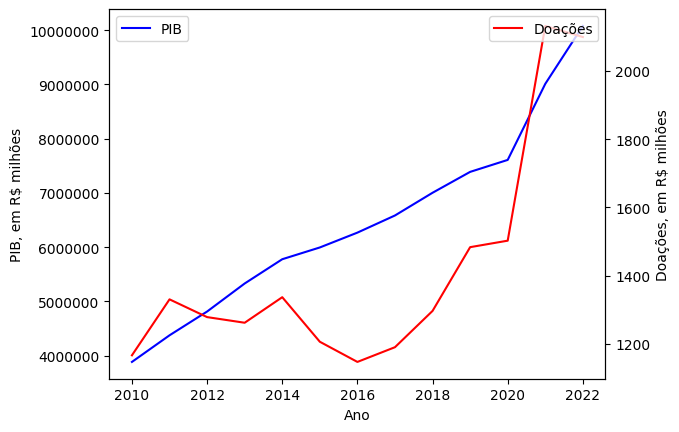

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pib_doacoes['ANO'], pib_doacoes['PIB'], color = 'blue', label='PIB')
ax.set_xlabel('Ano')
ax.set_ylabel('PIB, em R$ milhões')
ax2 = ax.twinx()
ax2.plot(pib_doacoes['ANO'], pib_doacoes['vl_total_doacao_milhoes'], color = 'red', label='Doações')
ax2.set_xlabel('Ano')
ax2.set_ylabel('Doações, em R$ milhões')
ax.legend(loc=0)
ax2.legend(loc=1)
ax.ticklabel_format(style='plain')
plt.show()

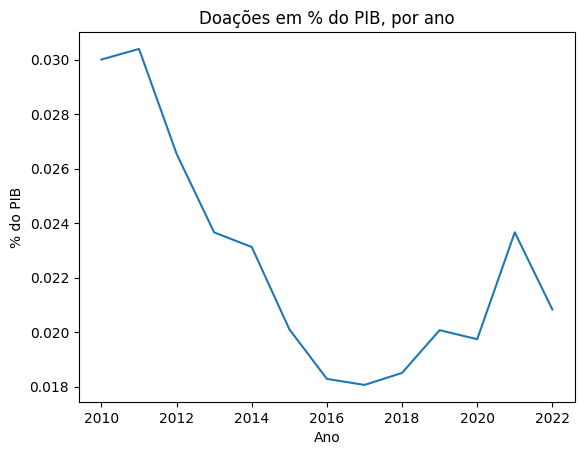

In [24]:
plt.plot(pib_doacoes['ANO'], pib_doacoes['%_PIB_doacoes'])
plt.xlabel('Ano')
plt.ylabel('% do PIB')
plt.title('Doações em % do PIB, por ano')
plt.show()

### 2.7. Visualizando o relacionamento entre PIB, arrecadação de IR, e doações

In [25]:
# Cria colunas com o PIB em R$ trilhões e as doações em R$ bilhões
pib_doacoes['PIB_trilhoes'] = pib_doacoes['PIB']/1000000
pib_doacoes['doacoes_bilhoes'] = pib_doacoes['vl_total_doacao_milhoes']/1000

In [26]:
# Gráfico de dispersão - PIB e valor das doações
import seaborn as sns

sns.lmplot(x='PIB_trilhoes', y='doacoes_bilhoes', data = pib_doacoes, ci = None)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Cálculo da correlação
pib_doacoes['PIB_trilhoes'].corr(pib_doacoes['doacoes_bilhoes'])

Observa-se que há uma correlação alta (acima de 0,70) entre o PIB e o valor total das doações. Pelo gráfico de dispersão, porém, pode-se notar que há vários pontos longe da reta de tendência, de modo que podemos dizer que a correlação entre ambas as variáveis, apesar de forte, pode não ser adequada para previsões.

In [ ]:
# Importação dos dados da arrecadação do IR
ir = pd.read_csv('DBF/Arrecadacao IR Milhoes.csv')
ir_doacoes = ir.merge(vls_doados_ano, left_on='Ano', right_on='ano_cal')
# Cria coluna com os valores do IR em R$ bilhões
ir_doacoes['IR_bilhoes'] = ir_doacoes['Arrecadacao IR Milhoes']/1000
# Cria coluna com os valores das doações em R$ bilhões
ir_doacoes['doacoes_bilhoes'] = ir_doacoes['vl_total_doacao_milhoes']/1000
#Gráfico de dispersão - Arrecadacao do IR e doações
sns.lmplot(x='IR_bilhoes', y='doacoes_bilhoes', data=ir_doacoes, ci=None)
plt.show()

In [ ]:
# Cálculo da correlação
ir_doacoes['IR_bilhoes'].corr(ir_doacoes['doacoes_bilhoes'])

Observa-se que há uma correlação alta (acima de 0,70) entre a arrecadação de IR e o valor total das doações. Pelo gráfico de dispersão, porém, pode-se notar que há vários pontos longe da reta de tendência, de modo que podemos dizer que a correlação entre ambas as variáveis, apesar de forte, pode não ser adequada para previsões.

### 2.8. Juntada dos dados de PIB por município

#### 2.8.1. Leitura do arquivo de PIB municipal

In [ ]:
# Leitura do arquivo contendo os dados do PIB dos anos de 2010 a 2021, por município
pibmun = pd.read_csv("DBF/Pib_municipios_2010_2021.csv", sep=";", thousands='.', usecols=[0,1,4,5], 
                                names = ["Ano", "UF", "munic", "PIB_em_milhares"], dtype={'Ano': 'int64', 'UF': 'str', 'munic':
                                                                              'str', 'PIB': 'int64'}, header=0)
# Cria coluna com os valores em milhares de reais
pibmun['PIB'] = pibmun['PIB_em_milhares']*1000

# Cria coluna com o município e a UF
pibmun["ano_mun"] = pibmun["Ano"].astype(str) + " - " + pibmun["munic"] + " - " + pibmun["UF"]

#Remove as colunas de município, UF e PIB em milhares
pibmun.drop(['UF','munic','PIB_em_milhares'], axis=1, inplace = True)
print(pibmun)
print(pibmun.info())

#### 2.8.2. Juntada com os arquivos de doações e de beneficiários

In [ ]:
# Cria coluna com o ano, município e UF nas tabelas de doações e de beneficiários
doacoes['ano_mun'] = doacoes['ano_cal'].astype(str) + " - " + doacoes['munic_doador']
benef['ano_mun'] = benef['ano_cal'].astype(str) + " - " + benef['munic_beneficiario']
print(doacoes)
print(benef)

In [ ]:
# Juntada dos dados do PIB municipal, por ano
doapibmun = doacoes.merge(pibmun, on="ano_mun", how='left')
benpibmun = benef.merge(pibmun, on="ano_mun", how='left')
print(doapibmun.head())
print(benpibmun.head())

#### 2.8.3. Tratamento dos valores ausentes

In [ ]:
# Verifica se há valores ausentes
print(doapibmun.info())
print(benpibmun.info())

Na tabela com os dados de doações, há 937 (14.182 - 13.245) valores nulos, nas colunas 'Ano' e 'PIB', as quais foram obtidas da tabela do PIB municipal. 
Na tabela com os dados de beneficiários, há 499 (5.787 - 5.288) valores nulos, nas mesmas colunas.
Vamos verificar esses valores, para decidir a melhor abordagem para seu tratamento.

In [ ]:
# Seleciona os valores nulos na coluna 'Ano', na base doapibmun
doanan = doapibmun[doapibmun['Ano'].isna()]
doanan

In [ ]:
# Seleciona os valores nulos na coluna 'Ano', na base benpibmun
bennan = benpibmun[benpibmun['Ano'].isna()]
bennan

Observa-se que, tanto na base de doações quanto na de beneficiários, há valores de 2022, em que não temos os dados do PIB, além de registros de anos anteriores, sendo que nestes a região do doador ou do beneficiário é "Exterior". Vamos verificar quantos registros há com cada uma dessas características.

In [ ]:
extdoa = doapibmun[doapibmun['regiao_doador']=='Exterior']
print('Registros do Exterior - tabela de doações:', extdoa.shape, 'linhas x colunas')
extben = benpibmun[benpibmun['regiao_benef']=='Exterior']
print('Registros do Exterior - tabela de beneficiários:', extben.shape, 'linhas x colunas')
doa22 = doapibmun[doapibmun['ano_cal']==2022]
print('Registros de 2022 - tabela de doações:', doa22.shape, 'linhas x colunas')
ben22 = benpibmun[benpibmun['ano_cal']==2022]
print('Registros de 2022 - tabela de beneficiários:', ben22.shape, 'linhas x colunas')

In [ ]:
extdoa22 = doa22[doa22['regiao_doador']=='Exterior']
extdoa22

Pode-se notar que todos os registros nulos são de doadores ou beneficiários no exterior, ou de valores de 2022.

##### 2.8.3.1. Tratamento dos registros em que a região seja "Exterior"

Vamos verificar os valores das doações feitas por doadores no exterior.

In [ ]:
extdoa

Vamos verificar as doações feitas para beneficiários no exterior:

In [ ]:
extben

Os valores poderão ser desconsiderados, sem que haja prejuízos para este estudo.

##### 2.8.3.2. Tratamento dos registros em que o ano seja 2022

Será necessário preencher o valor do PIB municipal para o ano de 2022. Optamos por aplicar o percentual de 11,85%, que foi o aumento do PIB, em valores correntes  de 2021 para 2022, aos valores de 2021.

In [ ]:
# Criação de subset com os dados do PIB municipal de 2021
pibmun22 = pibmun[pibmun['Ano']==2021]
#Criação de coluna com o ano de 2022
pibmun22['Ano2022']=2022
# Criação de coluna com o PIB municipal de 2022
pibmun22['PIB2022']=pibmun22['PIB']*1.1185
# Remoção das colunas anteriores
pibmun22.drop(['Ano','PIB'], inplace=True, axis=1)
# Alteração dos nomes das colunas
pibmun22.rename(columns={'Ano2022':'Ano','PIB2022':'PIB'}, inplace = True)
# Correção do ano na coluna "ano_mun"
pibmun22.replace('2021','2022', regex=True,inplace = True)
# Correção da ordem das colunas
colspibmun22 = ['Ano','PIB','ano_mun']
pibmun22=pibmun22[colspibmun22]
pibmun22

Iremos, agora, juntar os valores calculados para 2022 à base do PIB municipal

In [ ]:
pibmun=pd.concat([pibmun,pibmun22])
pibmun

Observa-se que o total de linhas da tabela do pib por município (72.395) é o valor anterior (66.825) acrescido da quantidade de registros da tabela do PIB 2022 por município (5.570).

##### 2.8.3.2. Nova juntada dos dados do PIB municipal

In [ ]:
# Juntada dos dados do PIB municipal, por ano
doapibmun = doacoes.merge(pibmun, on="ano_mun", how='left')
benpibmun = benef.merge(pibmun, on="ano_mun", how='left')
print(doapibmun.info())
print(benpibmun.info())

Iremos remover os dados em que a região do doador ou do beneficiário seja "Exterior".

In [ ]:
doadrop = doapibmun[doapibmun['regiao_doador']=='Exterior'].index
doapibmun.drop(doadrop, inplace=True)
doapibmun.info()

In [ ]:
bendrop = benpibmun[benpibmun['regiao_benef']=='Exterior'].index
benpibmun.drop(bendrop, inplace = True)
benpibmun.info()

### 2.9. Limpeza final dos dados

In [ ]:
doapibmun.drop(columns=['fonte','base_legal','regiao_doador','uf_doador','qtde_doadores','vl_total_dedutivel','Ano'], inplace = True)
#benpibmun.drop(columns=['fonte','base_legal','regiao_benef','uf_beneficiario','qtde_beneficiarios','vl_total_dedutivel','ano_mun','Ano'], inplace = True)
print(doapibmun)
#print(benpibmun)

In [ ]:
# Renomeia as colunas do dataframe de doações e altera o índice para o ano
doapibmun.rename(columns={'ano_cal':'ano', 'munic_doador': 'municipio', 'vl_total_doacao':'doacao', 'PIB':'PIB'}, inplace = True)


In [ ]:
# Altera o tipo de dados da coluna "ano" para datetime, para possibilitar o uso do modelo ARIMA.
# doapibmun['ano'].astype('int32')
# doapibmun['ano'] = pd.to_datetime(doapibmun['ano'],format = '%Y')
doapibmun.set_index('ano', inplace=True)
doapibmun

Para melhorar a performance dos algoritmos de machine learning, iremos substituir os dados presentes na coluna de município por um número inteiro.

In [ ]:
# Cria array com os municípios
municarray = doapibmun['municipio'].unique()
municarray.shape

In [ ]:
# Cria array com números de 1 a 2027
codigosarray = np.arange(start=1, stop=2028, step=1)
# Concatena as duas arrays em um dicionário
mun = {A: B for A, B in zip(municarray, codigosarray)}

In [ ]:
# Dataframe com os códigos de municípios
doapibmun['cdmun']=doapibmun['municipio'].map(mun)
cols5 = ['cdmun','doacao','PIB']
doacd = doapibmun[cols5]
doacd

In [ ]:
doacd.info()

Observa-se que não restaram dados nulos no dataframe.

### 2.10. Salvamento do dataframe gerado

Faremos o salvamento do dataframe gerado neste notebook para carregá-lo em um outro notebook, no qual realizaremos as predições.

In [ ]:
doapibmun.to_csv('doapibmun.csv')
doacd.to_csv('doacd.csv')
pibmun.to_csv('pibmun.csv')